In [2]:
# 📦 패키지 설치 (처음 한 번만)
!pip install pandas numpy statsmodels patsy

In [7]:
# 📁 데이터 로드
import pandas as
import statsmodels.formula.api as smf
data = pd.read_csv('/content/human_similarity_data.csv')
print("Shape of data after loading:")
print(data.shape)
print("First 5 rows of data:")
display(data.head())

Shape of data after loading:
(1710, 7)
First 5 rows of data:


,similarity_score,relation_type,verb,label_A,label_B,participant_id,sentence_pair_id
0,1,dissimilar,break,destruction,interruption,S1,B1
1,1,dissimilar,break,disclosure,bodily harm,S1,B2
2,3,dissimilar,break,violation,decoding,S1,B3
3,4,dissimilar,break,breakthrough,emotional/psychological/social breakdown,S1,B4
4,1,dissimilar,break,emergence,bodily harm,S1,B5


In [8]:
# 🔍 카테고리 변수로 명시하고, 기준 범주 설정
data['relation_type'] = pd.Categorical(data['relation_type'], categories=[
    'dissimilar', 'extension', 'subcategories', 'same sense_diff reading',
    'extension_overlap', 'causal_overlap'
])
data['verb'] = pd.Categorical(data['verb'], categories=['freeze', 'break'])

In [9]:
import statsmodels.formula.api as smf

ols_model = smf.ols(
    'similarity_score ~ C(relation_type, Treatment(reference="dissimilar")) + '
    'C(verb, Treatment(reference="freeze"))',
    data=data
).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:       similarity_score   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 02 Sep 2025   Prob (F-statistic):          6.25e-126
Time:                        04:34:36   Log-Likelihood:                -2803.2
No. Observations:                1710   AIC:                             5620.
Df Residuals:                    1703   BIC:                             5658.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [12]:
# 📋 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       similarity_score   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 02 Sep 2025   Prob (F-statistic):          6.25e-126
Time:                        04:35:03   Log-Likelihood:                -2803.2
No. Observations:                1710   AIC:                             5620.
Df Residuals:                    1703   BIC:                             5658.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Simplified labels for plotting:
['Intercept', 'relation_type: extension', 'relation_type: subcategories', 'relation_type: same sense_diff reading', 'relation_type: extension_overlap', 'relation_type: causal_overlap', 'verb: break']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'model_results_with_coeffs.txt' 파일이 저장되었고 다운로드가 시작되었습니다.


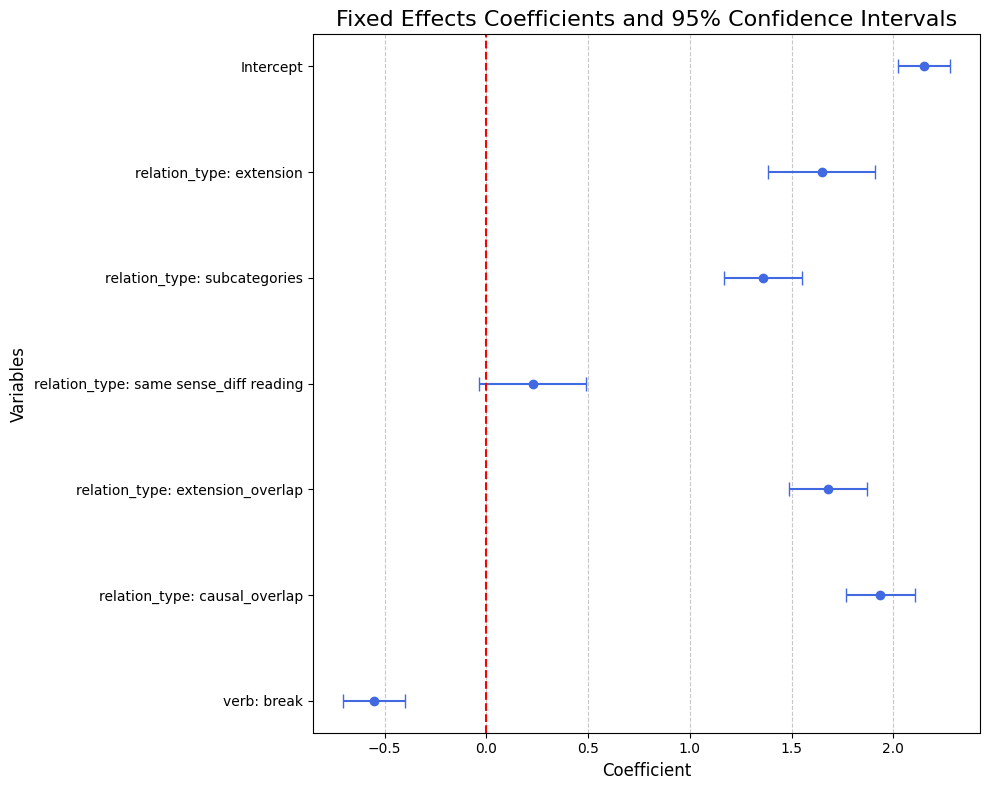

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 1. 고정 효과 계수 및 신뢰구간 추출
fe_params = ols_model.params
conf = ols_model.conf_int()
conf['OR'] = fe_params
conf.columns = ['2.5%', '97.5%', 'Coefficient']

# 고정 효과 이름 단순화 (relation_type: extension, verb: break 형식으로)
simplified_labels = []
for label in conf.index:
    if 'relation_type' in label:
        part = label.split('T.')[-1].replace(']', '')
        simplified_labels.append(f'relation_type: {part}')
    elif 'verb' in label:
        part = label.split('T.')[-1].replace(']', '')
        simplified_labels.append(f'verb: {part}')
    else:
        simplified_labels.append(label) # Keep Intercept or other labels as is

conf.index = simplified_labels


# Simplified labels for verification
print("Simplified labels for plotting:")
print(conf.index.tolist())


# 2. 결과 파일에 계수 정보 추가하여 저장 및 다운로드
# 기존 요약
results_summary = ols_model.summary().as_text()

# 추가할 계수 정보
coeffs_summary = conf.to_string()

# 파일에 저장
file_name = 'model_results_with_coeffs.txt'
with open(file_name, 'w') as f:
    f.write("Mixed Linear Model Regression Results\n")
    f.write("=======================================\n")
    f.write(results_summary)
    f.write("\n\n\nFixed Effects Coefficients and 95% Confidence Intervals\n")
    f.write("=========================================================\n")
    f.write(coeffs_summary)

# 파일 다운로드
files.download(file_name)
print(f"'{file_name}' 파일이 저장되었고 다운로드가 시작되었습니다.")


# 3. 시각화
plt.figure(figsize=(10, 8))
# y축 순서를 위에서 아래로
y = np.arange(len(conf.index))[::-1]
plt.errorbar(x=conf['Coefficient'], y=y,
             xerr=[conf['Coefficient'] - conf['2.5%'], conf['97.5%'] - conf['Coefficient']],
             fmt='o', capsize=5, color='royalblue')

plt.yticks(y, conf.index)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Fixed Effects Coefficients and 95% Confidence Intervals', fontsize=16)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()